In [2]:

import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
import matplotlib.pyplot as plt

# Suppress warnings for clearer output
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Assuming test data (X_test, y_test) and trained model saved as "best_lstm_model.keras"
# Load test features and labels
X_test = np.load("rolling_window_sequences.npy")  # Replace with actual file path
metadata_test = pd.read_csv("sequence_metadata_with_RUL.csv")  # Replace with actual file path
y_test = metadata_test["RUL"].values

print("Test feature shape:", X_test.shape)
print("Test target shape:", y_test.shape)

# Load trained LSTM model
model = tf.keras.models.load_model("best_gru_model.keras")

Test feature shape: (17731, 30, 66)
Test target shape: (17631,)


In [4]:
# Predict using batches (avoids MemoryError)
y_pred = model.predict(X_test, batch_size=64)
print("y_pred shape before flatten:", y_pred.shape)


278/278 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step
y_pred shape before flatten: (17731, 1)


In [5]:
y_pred = y_pred.flatten()
print("y_pred shape after flatten:", y_pred.shape)



y_pred shape after flatten: (17731,)


In [7]:

# Align lengths
min_len = min(len(y_test), len(y_pred))
y_test = y_test[:min_len]
y_pred = y_pred[:min_len]

print("After alignment:")
print("y_test length:", len(y_test))
print("y_pred length:", len(y_pred))


After alignment:
y_test length: 17631
y_pred length: 17631


In [10]:
import numpy as np

print("y_test NaNs:", np.isnan(y_test).sum())
print("y_pred NaNs:", np.isnan(y_pred).sum())



y_test NaNs: 0
y_pred NaNs: 400


In [11]:

for i in range(X_test.shape[2]):
    mean_val = np.nanmean(X_test[:, :, i])
    X_test[:, :, i][np.isnan(X_test[:, :, i])] = mean_val


In [12]:
y_pred = model.predict(X_test, batch_size=64).flatten()


278/278 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


In [13]:
y_pred = np.nan_to_num(y_pred, nan=0.0)


In [14]:
min_len = min(len(y_test), len(y_pred))
y_test = y_test[:min_len]
y_pred = y_pred[:min_len]


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}")


RMSE: 106.1534, MAE: 96.9086


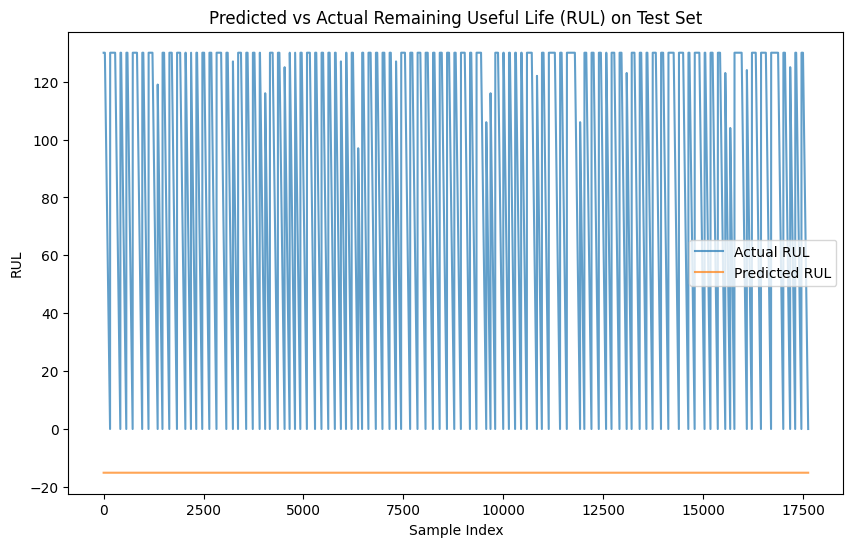

In [16]:
# Visualize Actual Vs Predict RUL
plt.figure(figsize=(10,6))
plt.plot(y_test, label='Actual RUL', alpha=0.7)
plt.plot(y_pred, label='Predicted RUL', alpha=0.7)
plt.title('Predicted vs Actual Remaining Useful Life (RUL) on Test Set')
plt.xlabel('Sample Index')
plt.ylabel('RUL')
plt.legend()
plt.show()